# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [5]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [6]:
# Extract all rows of data
# Find the table in the HTML
table = soup.find('table', class_='table')  # Adjust class if needed

# Extract table headers
headers = [header.text.strip() for header in table.find_all('th')]

# Extract all rows of data
rows = table.find_all('tr')

# Create a list to store the data
all_data = []

# Loop through each row and extract the data
for row in rows[1:]:  # Skip the header row
    cols = row.find_all('td')
    row_data = [col.text.strip() for col in cols]
    all_data.append(row_data)

# Create a DataFrame with the data
df = pd.DataFrame(all_data, columns=headers)

# Display the DataFrame
print(df)



        id terrestrial_date   sol   ls month min_temp pressure
0        2       2012-08-16    10  155     6    -75.0    739.0
1       13       2012-08-17    11  156     6    -76.0    740.0
2       24       2012-08-18    12  156     6    -76.0    741.0
3       35       2012-08-19    13  157     6    -74.0    732.0
4       46       2012-08-20    14  157     6    -74.0    740.0
...    ...              ...   ...  ...   ...      ...      ...
1862  1889       2018-02-23  1973  133     5    -78.0    730.0
1863  1892       2018-02-24  1974  134     5    -77.0    729.0
1864  1894       2018-02-25  1975  134     5    -76.0    729.0
1865  1893       2018-02-26  1976  135     5    -77.0    728.0
1866  1895       2018-02-27  1977  135     5    -77.0    727.0

[1867 rows x 7 columns]


### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [8]:
# Create an empty list to store the rows
data_rows = []

# Loop through the scraped rows and extract data
for row in rows[1:]:  # Skip the header row
    # Extract all data cells (td elements) within the row
    cols = row.find_all('td')
    # Create a list of the text content from each cell
    row_data = [col.text.strip() for col in cols]
    # Append the row data to the list
    data_rows.append(row_data)

# Print the list of data rows to confirm the extracted data
data_rows

[['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'],
 ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'],
 ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'],
 ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0'],
 ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0'],
 ['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0'],
 ['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0'],
 ['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0'],
 ['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0'],
 ['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0'],
 ['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0'],
 ['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0'],
 ['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0'],
 ['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0'],
 ['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0'],
 ['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0'],
 ['171', '2012-09-04', '29', '166', '6', '-75.0',

In [ ]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
df = pd.DataFrame(data_rows, columns=headers)
df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [9]:
# Examine data type of each column


id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [11]:
# Change data types for data analysis
# Convert the 'id' column to integers
df['id'] = df['id'].astype(int)

# Convert 'terrestrial_date' to a datetime format
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])

# Convert 'sol' to integers
df['sol'] = df['sol'].astype(int)

# Convert 'ls' to integers
df['ls'] = df['ls'].astype(int)

# Convert 'month' to integers
df['month'] = df['month'].astype(int)

# Convert 'min_temp' to floats
df['min_temp'] = df['min_temp'].astype(float)

# Convert 'pressure' to floats
df['pressure'] = df['pressure'].astype(float)

# Check the data types after conversion
df.dtypes

id                           int32
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [12]:
# 1. How many months are there on Mars?
# Count the number of unique months in the 'month' column
num_months_on_mars = df['month'].nunique()
print(f"There are {num_months_on_mars} months on Mars.")

There are 12 months on Mars.


In [13]:
# 2. How many sols (Martian days) worth of data are there?
# Count the number of unique sols in the 'sol' column
num_sols = df['sol'].nunique()
print(f"There are {num_sols} sols worth of data in the dataset.")

There are 1867 sols worth of data in the dataset.


In [14]:
# 3. What is the average minimum temperature by month?
# Calculate the average minimum temperature for each month
avg_min_temp_by_month = df.groupby('month')['min_temp'].mean()

# Display the results
print(avg_min_temp_by_month)

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


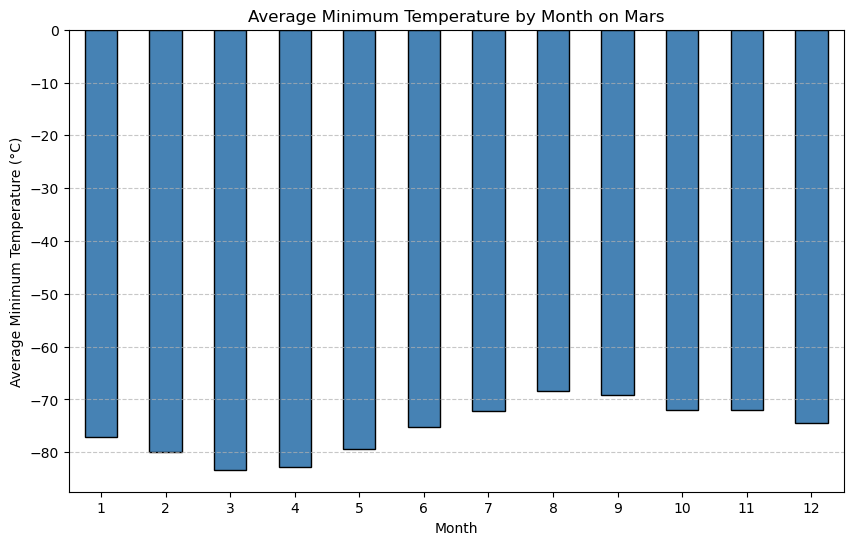

In [28]:
# Plot the average minimum temperature by month
import matplotlib.pyplot as plt

# Calculate the average minimum temperature by month
avg_min_temp_by_month = df.groupby('month')['min_temp'].mean()

# Plotting the average minimum temperature
plt.figure(figsize=(10, 6))
avg_min_temp_by_month.plot(kind='bar', color='steelblue', edgecolor='black')
plt.title('Average Minimum Temperature by Month on Mars')
plt.xlabel('Month')
plt.ylabel('Average Minimum Temperature (°C)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('Average Minimum Temperature by Month on Mars.png')
plt.show()

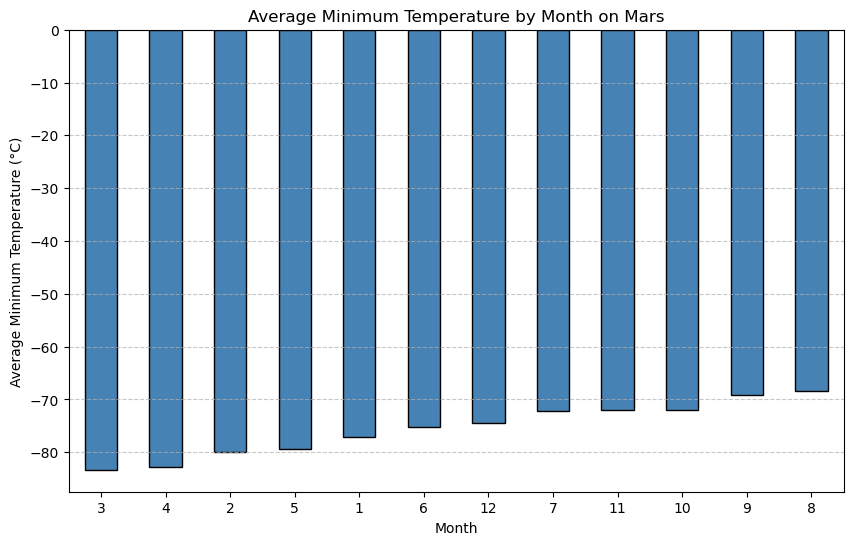

The coldest month on Mars is month 3.
The hottest month on Mars is month 8.


In [33]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
import matplotlib.pyplot as plt

# Calculate and sort the average minimum temperature by month
avg_min_temp_by_month = df.groupby('month')['min_temp'].mean().sort_values()

# Plotting the sorted average minimum temperature
plt.figure(figsize=(10, 6))
avg_min_temp_by_month.plot(kind='bar', color='steelblue', edgecolor='black')
plt.title('Average Minimum Temperature by Month on Mars')
plt.xlabel('Month')
plt.ylabel('Average Minimum Temperature (°C)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('Average Minimum Temperature by Month on Mars sorted.png')
plt.show()

# Display the coldest and hottest months
coldest_month = avg_min_temp_by_month.idxmin()
hottest_month = avg_min_temp_by_month.idxmax()
print(f"The coldest month on Mars is month {coldest_month}.")
print(f"The hottest month on Mars is month {hottest_month}.")

In [19]:
# 4. What is the average pressure by month?
# Calculate the average pressure for each month
avg_pressure_by_month = df.groupby('month')['pressure'].mean()

# Display the results
print(avg_pressure_by_month)

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


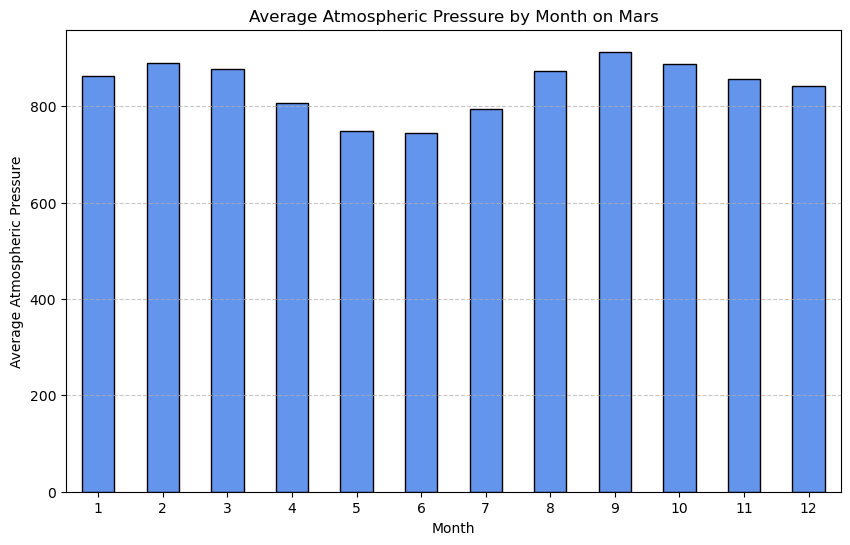

In [31]:
# Plot the average pressure by month
import matplotlib.pyplot as plt

# Calculate the average pressure by month
avg_pressure_by_month = df.groupby('month')['pressure'].mean()

# Plotting the average pressure
plt.figure(figsize=(10, 6))
avg_pressure_by_month.plot(kind='bar', color='cornflowerblue', edgecolor='black')
plt.title('Average Atmospheric Pressure by Month on Mars')
plt.xlabel('Month')
plt.ylabel('Average Atmospheric Pressure')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('Average Atmospheric Pressure by Month on Mars')
plt.show()

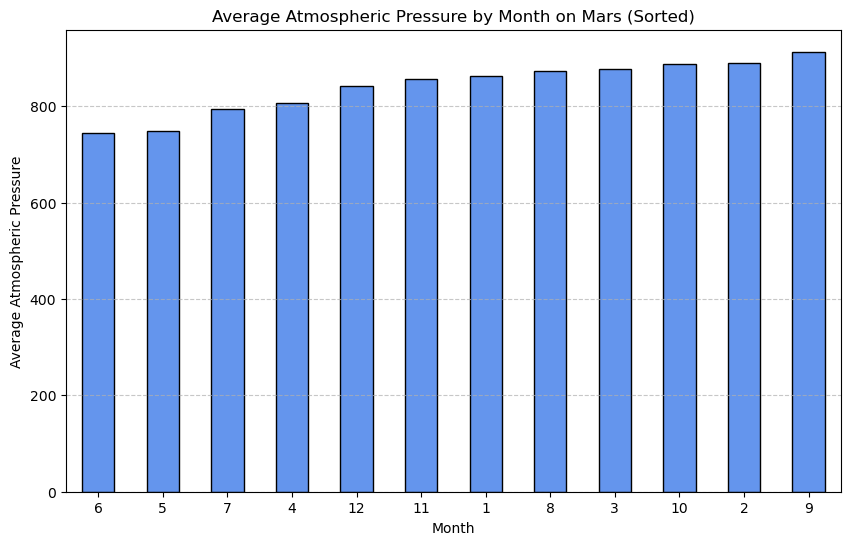

The month with the lowest average atmospheric pressure on Mars is month 6.
The month with the highest average atmospheric pressure on Mars is month 9.


In [32]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
import matplotlib.pyplot as plt

# Calculate and sort the average pressure by month
avg_pressure_by_month = df.groupby('month')['pressure'].mean().sort_values()

# Plotting the sorted average pressure
plt.figure(figsize=(10, 6))
avg_pressure_by_month.plot(kind='bar', color='cornflowerblue', edgecolor='black')
plt.title('Average Atmospheric Pressure by Month on Mars (Sorted)')
plt.xlabel('Month')
plt.ylabel('Average Atmospheric Pressure')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('daAverage Atmospheric Pressure by Month on Mars (Sorted).png')
plt.show()

# Display the lowest and highest pressure months
lowest_pressure_month = avg_pressure_by_month.idxmin()
highest_pressure_month = avg_pressure_by_month.idxmax()
print(f"The month with the lowest average atmospheric pressure on Mars is month {lowest_pressure_month}.")
print(f"The month with the highest average atmospheric pressure on Mars is month {highest_pressure_month}.")

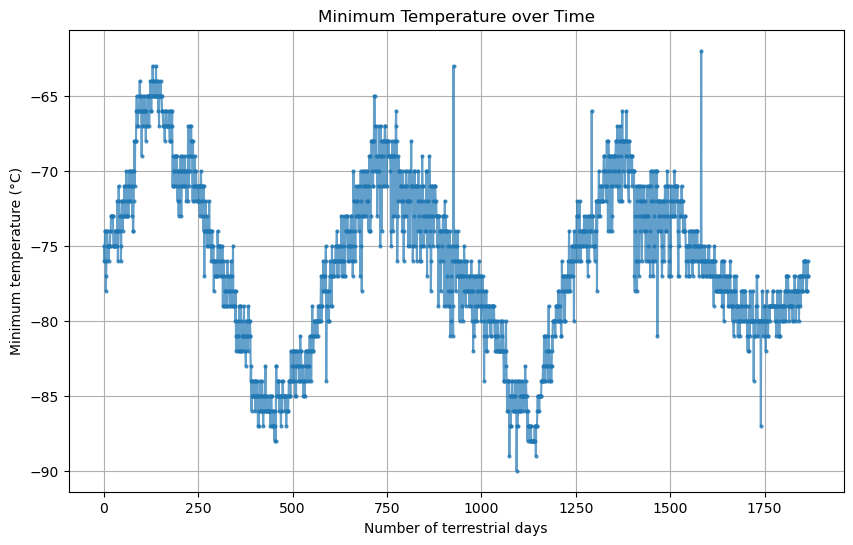

In [34]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
import matplotlib.pyplot as plt


# Create a sequential index for terrestrial days
terrestrial_days = range(len(df))

# Plotting the daily minimum temperature using terrestrial days as x-axis
plt.figure(figsize=(10, 6))
plt.plot(terrestrial_days, df['min_temp'], marker='o', linestyle='-', markersize=2, alpha=0.7)
plt.title('Minimum Temperature over Time')
plt.xlabel('Number of terrestrial days')
plt.ylabel('Minimum temperature (°C)')
plt.grid(True)
plt.savefig('Minimum Temperature over Time.png')
plt.show()

#### Minimum Temperature

YOUR ANALYSIS HERE

#### Atmospheric Pressure

YOUR ANALYSIS HERE

#### Year Length

YOUR ANALYSIS HERE

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [26]:
# Write the data to a CSV
df.to_csv('mars_weather_data.csv', index=False)

In [27]:
browser.quit()